This is a quick introduction to my [MLS dataset](https://www.kaggle.com/josephvm/major-league-soccer-dataset). It will quickly show each file, show a few tricks, and then have one graph. 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Open the files (my local paths)
match_df = pd.read_csv(os.path.join('data', 'game_stats', '2020', '2020_matches.csv'))
event_df = pd.read_csv(os.path.join('data', 'game_stats', '2020', '2020_events.csv'))
table_df = pd.read_csv(os.path.join('data', 'tables', 'all_tables.csv'))
player_df = pd.read_csv(os.path.join('data', 'player_stats',  'all_players.csv'))
gk_df = pd.read_csv(os.path.join('data', 'player_stats',  'all_goalkeepers.csv'))

# match_df

In [3]:
match_df.tail(3)

,id,home,away,date,year,time (utc),attendance,venue,league,part_of_competition,...,away_bench_9_minute,away_bench_10_num,away_bench_10,away_bench_10_minute,away_bench_11_num,away_bench_11,away_bench_11_minute,away_bench_12_num,away_bench_12,away_bench_12_minute
67,571928,Seattle Sounders FC,LAFC,"Monday, July 27",2020,03:00,NaN,ESPN Wide World of Sports Complex,2020 Major League Soccer,MLS is Back - Round of 16,...,80',13.0,Mohamed El-Munir,45',16.0,Danny Musovski,80',11.0,José Cifuentes,90'
68,571927,Columbus Crew SC,Minnesota United FC,"Tuesday, July 28",2020,00:00,NaN,ESPN Wide World of Sports Complex,2020 Major League Soccer,MLS is Back - Round of 16,...,64',12.0,Aaron Schoenfeld,77',44.0,Raheem Edwards,78',NaN,NaN,NaN
69,571926,Portland Timbers,FC Cincinnati,"Tuesday, July 28",2020,02:30,NaN,ESPN Wide World of Sports Complex,2020 Major League Soccer,MLS is Back - Round of 16,...,59',10.0,Jürgen Locadia,72',8.0,Allan Cruz,59',11.0,Siem De Jong,58'


In [4]:
# to get rid of the starting and bench columns
match2_df = match_df[[item for item in match_df.columns.tolist() if 'starting' not in item and 'bench' not in item]]
match2_df.head()

,id,home,away,date,year,time (utc),attendance,venue,league,part_of_competition,...,home_wonCorners,away_wonCorners,home_saves,away_saves,home_goal_minutes,home_goal_scorers,away_goal_minutes,away_goal_scorers,home_formation,away_formation
0,560551,DC United,Colorado Rapids,"Saturday, February 29",2020,18:00,"16,932",NaN,2020 Major League Soccer,Regular Season - Group Stage,...,1,8,5,3,60',Russell Canouse,67':90'+2',Kei Kamara:Jonathan Lewis,4-2-3-1,4-2-3-1
1,560550,Montreal Impact,New England Revolution,"Saturday, February 29",2020,20:00,"21,006",NaN,2020 Major League Soccer,Regular Season - Group Stage,...,4,3,5,1,37':80',Romell Quioto:Maximiliano Urruti,13',Teal Bunbury,3-4-2-1,4-2-3-1
2,560549,Houston Dynamo,LA Galaxy,"Saturday, February 29",2020,20:30,"22,039",NaN,2020 Major League Soccer,Regular Season - Group Stage,...,6,1,2,1,54',Mauro Manotas,13',Cristian Pavón,4-3-3,4-3-3
3,560548,San Jose Earthquakes,Toronto FC,"Saturday, February 29",2020,22:30,"18,000",NaN,2020 Major League Soccer,Regular Season - Group Stage,...,3,7,2,3,53':90'+5',Andrés Ríos:Oswaldo Alanís,40' PEN:51',Alejandro Pozuelo:Richie Laryea,4-3-3,4-4-2
4,560546,FC Dallas,Philadelphia Union,"Saturday, February 29",2020,23:00,"16,219",NaN,2020 Major League Soccer,Regular Season - Group Stage,...,3,8,3,3,61':90'+1',Zdenek Ondrasek:Paxton Pomykal,NaN,NaN,4-2-3-1,4-1-2-1-2


In [5]:
match2_df.columns.tolist()

['id',
 'home',
 'away',
 'date',
 'year',
 'time (utc)',
 'attendance',
 'venue',
 'league',
 'part_of_competition',
 'game_status',
 'shootout',
 'home_score',
 'away_score',
 'home_possessionPct',
 'away_possessionPct',
 'home_shotsSummary',
 'away_shotsSummary',
 'home_foulsCommitted',
 'away_foulsCommitted',
 'home_yellowCards',
 'away_yellowCards',
 'home_redCards',
 'away_redCards',
 'home_offsides',
 'away_offsides',
 'home_wonCorners',
 'away_wonCorners',
 'home_saves',
 'away_saves',
 'home_goal_minutes',
 'home_goal_scorers',
 'away_goal_minutes',
 'away_goal_scorers',
 'home_formation',
 'away_formation']

In [6]:
# Depending on what you're doing, there's other columns you can safely drop
# for example, unless you're merging this with other soccer data, 'league' can be dropped
# for example, 'shootout' and 'game_status' won't really tell you anything for regular 
# ... season games as there are no shootouts
match3_df = match2_df.drop(['time (utc)', 'venue', 'league', 'part_of_competition', 'shootout', 'game_status'], axis=1)
match3_df.head()

,id,home,away,date,year,attendance,home_score,away_score,home_possessionPct,away_possessionPct,...,home_wonCorners,away_wonCorners,home_saves,away_saves,home_goal_minutes,home_goal_scorers,away_goal_minutes,away_goal_scorers,home_formation,away_formation
0,560551,DC United,Colorado Rapids,"Saturday, February 29",2020,"16,932",1,2,47%,53%,...,1,8,5,3,60',Russell Canouse,67':90'+2',Kei Kamara:Jonathan Lewis,4-2-3-1,4-2-3-1
1,560550,Montreal Impact,New England Revolution,"Saturday, February 29",2020,"21,006",2,1,57%,43%,...,4,3,5,1,37':80',Romell Quioto:Maximiliano Urruti,13',Teal Bunbury,3-4-2-1,4-2-3-1
2,560549,Houston Dynamo,LA Galaxy,"Saturday, February 29",2020,"22,039",1,1,59%,41%,...,6,1,2,1,54',Mauro Manotas,13',Cristian Pavón,4-3-3,4-3-3
3,560548,San Jose Earthquakes,Toronto FC,"Saturday, February 29",2020,"18,000",2,2,63%,37%,...,3,7,2,3,53':90'+5',Andrés Ríos:Oswaldo Alanís,40' PEN:51',Alejandro Pozuelo:Richie Laryea,4-3-3,4-4-2
4,560546,FC Dallas,Philadelphia Union,"Saturday, February 29",2020,"16,219",2,0,50%,50%,...,3,8,3,3,61':90'+1',Zdenek Ondrasek:Paxton Pomykal,NaN,NaN,4-2-3-1,4-1-2-1-2


# event_df

In [7]:
# Using the 'id' column from '2020_matches.csv', you can get the events for a game
# Note: This is the full commentary, not just key events
one_game_events_df = event_df[ event_df['id']==571931 ]
print(len(one_game_events_df))
one_game_events_df.head()

115


,id,Time,Event
6940,571931,-,Lineups are announced and players are warming up.
6941,571931,-,First Half begins.
6942,571931,1',Andrés Ríos (San Jose Earthquakes) wins a free...
6943,571931,1',Foul by Justen Glad (Real Salt Lake).
6944,571931,3',Attempt missed. Douglas Martínez (Real Salt La...


In [8]:
# Specific events can be found by searching for keywords
# The format for specific events, like goals and yellow cards seem to be consistent
one_game_events_df[ one_game_events_df['Event'].str.contains('Goal!')]

,id,Time,Event
6958,571931,21',"Goal! San Jose Earthquakes 1, Real Salt Lake ..."
6959,571931,22',"Goal! San Jose Earthquakes 1, Real Salt Lake ..."
7002,571931,49',"Goal! San Jose Earthquakes 2, Real Salt Lake ..."
7017,571931,61',"Goal! San Jose Earthquakes 3, Real Salt Lake ..."
7028,571931,75',"Goal! San Jose Earthquakes 3, Real Salt Lake ..."
7040,571931,86',"Goal! San Jose Earthquakes 4, Real Salt Lake ..."
7051,571931,90'+6',"Goal! San Jose Earthquakes 5, Real Salt Lake ..."


In [9]:
# Similarly, all events for one team in a game
one_game_events_df[ one_game_events_df['Event'].str.contains('San Jose Earthquakes')]

,id,Time,Event
6942,571931,1',Andrés Ríos (San Jose Earthquakes) wins a free...
6945,571931,6',Attempt saved. Nick Lima (San Jose Earthquakes...
6948,571931,8',Foul by Judson (San Jose Earthquakes).
6949,571931,10',Attempt missed. Cristian Espinoza (San Jose Ea...
6951,571931,11',Foul by Guram Kashia (San Jose Earthquakes).
...,...,...,...
7048,571931,90'+4',Foul by Carlos Fierro (San Jose Earthquakes).
7050,571931,90'+5',VAR Decision: Penalty San Jose Earthquakes.
7051,571931,90'+6',"Goal! San Jose Earthquakes 5, Real Salt Lake ..."
7052,571931,90'+7',"Second Half ends, San Jose Earthquakes 5, Real..."


# table_df

In [10]:
# The table for each year has two 1s, two 2s, etc. as the teams are split into two conferences
# Across the years, the Eastern Conference is first and the Western Conference is second
table_2003 = table_df[ table_df['Year']==2003 ].reset_index()

In [11]:
east, west = np.array_split(table_2003, [table_2003[ table_2003['Place'] == 1 ].index[1]])
east

,index,Place,Team,GP,W,D,L,GF,GA,GD,P,Year
0,0,1,Chicago Fire FC,30,15,8,7,53,43,10,53,2003.0
1,1,2,New England Revolution,30,12,9,9,55,47,8,45,2003.0
2,2,3,New York Red Bulls,30,11,9,10,40,40,0,42,2003.0
3,3,4,DC United,30,10,9,11,38,36,2,39,2003.0
4,4,5,Columbus Crew SC,30,10,8,12,44,44,0,38,2003.0


In [12]:
west

,index,Place,Team,GP,W,D,L,GF,GA,GD,P,Year
5,5,1,San Jose Earthquakes,30,14,9,7,45,35,10,51,2003.0
6,6,2,Sporting Kansas City,30,11,9,10,48,44,4,42,2003.0
7,7,3,Colorado Rapids,30,11,7,12,40,45,-5,40,2003.0
8,8,4,LA Galaxy,30,9,9,12,35,35,0,36,2003.0
9,9,5,FC Dallas,30,6,5,19,35,64,-29,23,2003.0


In [13]:
# Splitting the whole df into two lists, one for each conference
# Note: Some teams have switched conferences at some point
conferences = np.array_split(table_df, table_df[ table_df['Place'] == 1 ].index[1:].tolist())
easts, wests = conferences[::2], conferences[1::2]
print('east len', len(easts))
print(easts[0])
print('west len', len(wests))
print(wests[-1])

east len 18
   Place                    Team  GP   W  D   L  GF  GA  GD   P    Year
0      1         Chicago Fire FC  30  15  8   7  53  43  10  53  2003.0
1      2  New England Revolution  30  12  9   9  55  47   8  45  2003.0
2      3      New York Red Bulls  30  11  9  10  40  40   0  42  2003.0
3      4               DC United  30  10  9  11  38  36   2  39  2003.0
4      5        Columbus Crew SC  30  10  8  12  44  44   0  38  2003.0
west len 18
     Place                  Team  GP  W  D  L  GF  GA  GD   P    Year
300      1  Sporting Kansas City   5  4  0  1  13   5   8  12  2020.0
301      2   Minnesota United FC   5  3  2  0  12   6   6  11  2020.0
302      3      Portland Timbers   5  3  1  1   8   7   1  10  2020.0
303      4                  LAFC   5  2  3  0  15  10   5   9  2020.0
304      5   Seattle Sounders FC   5  2  2  1   7   4   3   8  2020.0
305      6  San Jose Earthquakes   5  2  2  1  10  10   0   8  2020.0
306      7       Colorado Rapids   5  2  1  2   8   9 

# player_df

In [14]:
player_df = player_df[ player_df['Year'] == 2020]

# Default sorted by goals ('G')
player_df.head()

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,RdA,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season
14610,Diego Rossi,LAFC,F,5,5,450,6,2,22,13,...,0.0,0.40,4,7,4,0,0,59.09,2020,reg
14611,Ayo Akinola,TOR,F,3,3,266,5,0,13,10,...,0.0,0.00,5,2,3,0,0,76.92,2020,reg
14612,Gyasi Zardes,CLB,F,5,5,402,4,0,8,5,...,0.0,0.00,0,5,6,0,0,62.50,2020,reg
14613,Chris Mueller,ORL,F,5,4,351,4,0,12,8,...,0.0,0.00,1,4,0,0,0,66.67,2020,reg
14614,Alan Pulido,SKC,F,5,5,442,3,4,15,5,...,2.0,0.81,3,10,5,1,0,33.33,2020,reg


In [15]:
# you can search through two columns at once like so
player_df[ (player_df['SOG%'] > 50) & (player_df['SHTS'] > 10)].sort_values('SOG%', ascending=False)

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,RdA,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season
14611,Ayo Akinola,TOR,F,3,3,266,5,0,13,10,...,0.0,0.0,5,2,3,0,0,76.92,2020,reg
14620,Khiry Shelton,SKC,F,5,5,443,3,1,11,8,...,0.0,0.2,4,3,0,1,0,72.73,2020,reg
14613,Chris Mueller,ORL,F,5,4,351,4,0,12,8,...,0.0,0.0,1,4,0,0,0,66.67,2020,reg
14610,Diego Rossi,LAFC,F,5,5,450,6,2,22,13,...,0.0,0.4,4,7,4,0,0,59.09,2020,reg
14713,Vako,SJ,M,5,5,379,1,0,14,8,...,0.0,0.0,4,4,0,0,0,57.14,2020,reg
14711,Kacper Przybylko,PHI,F,5,5,450,1,0,11,6,...,0.0,0.0,4,9,6,0,0,54.55,2020,reg
14712,Kellyn Acosta,COL,M,5,5,433,1,0,11,6,...,0.0,0.0,5,4,0,2,0,54.55,2020,reg


# gk_df

In [16]:
gk_df = gk_df[ gk_df['Year'] == 2020 ]
gk_df.head()

,Player,Club,POS,GP,GS,MINS,SHTS,SV,GA,GAA,PKG/A,W,L,T,ShO,W%,Sv%,Year,Season
1852,Luis Robles,MIA,GK,5,5,450,20,12,8,1.6,1/1,0,5,0,0,0.0,60.0,2020,reg
1853,Brad Guzan,ATL,GK,5,5,450,18,13,5,1.0,0/0,2,3,0,0,40.0,72.2,2020,reg
1854,Kenneth Kronholm,CHI,GK,5,5,450,17,7,8,1.6,0/0,1,3,1,0,20.0,41.2,2020,reg
1855,Daniel Vega,SJ,GK,5,5,450,25,16,10,2.0,1/2,2,1,2,2,40.0,64.0,2020,reg
1856,Stefan Frei,SEA,GK,5,5,450,21,17,4,0.8,0/0,2,1,2,2,40.0,81.0,2020,reg


In [17]:
# You can split the penalty kick column into two
gk_df[['PKNS', 'PKF']] = gk_df['PKG/A'].str.split('/', expand=True) # penalties not saved, penalties faced
gk_df.head()

,Player,Club,POS,GP,GS,MINS,SHTS,SV,GA,GAA,...,W,L,T,ShO,W%,Sv%,Year,Season,PKNS,PKF
1852,Luis Robles,MIA,GK,5,5,450,20,12,8,1.6,...,0,5,0,0,0.0,60.0,2020,reg,1,1
1853,Brad Guzan,ATL,GK,5,5,450,18,13,5,1.0,...,2,3,0,0,40.0,72.2,2020,reg,0,0
1854,Kenneth Kronholm,CHI,GK,5,5,450,17,7,8,1.6,...,1,3,1,0,20.0,41.2,2020,reg,0,0
1855,Daniel Vega,SJ,GK,5,5,450,25,16,10,2.0,...,2,1,2,2,40.0,64.0,2020,reg,1,2
1856,Stefan Frei,SEA,GK,5,5,450,21,17,4,0.8,...,2,1,2,2,40.0,81.0,2020,reg,0,0


# Quick Analysis

In [20]:
player_df = pd.read_csv(os.path.join('data', 'player_stats',  'all_players.csv'))

g_90 = []
g = []
names = []
for year in range(1996, 2020):
    p_df = player_df[ player_df['Year']==year ]
    g_90.append(p_df.iloc[0]['G/90min'])
    g.append(p_df.iloc[0]['G'])
    names.append([p_df.iloc[0]['Year'], p_df.iloc[0]['Player']])

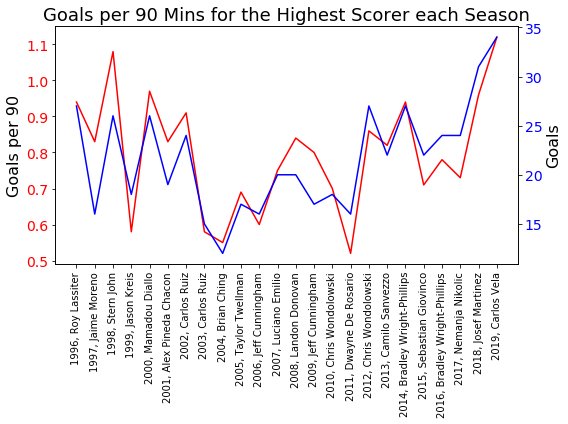

In [55]:
fig, ax1 = plt.subplots(figsize=(8,6))

plt.title('Goals per 90 Mins for the Highest Scorer each Season', fontdict={'fontsize':18})
#plt.xlabel('Season', fontdict={'fontsize':16})
ax1.set_ylabel('Goals per 90', fontdict={'fontsize':16})
ax1.plot(range(1996, 2020), g_90, c='r')
ax1.tick_params(axis='y', labelcolor='r', labelsize=14)

ax2 = ax1.twinx()
ax2.plot(range(1996, 2020), g, c='b')
ax2.set_ylabel('Goals', fontdict={'fontsize':16})
ax2.tick_params(axis='y', labelcolor='b', labelsize=14)

ax1.set_xticks(range(1996, 2020))
ax1.set_xticklabels([str(name[0])+", "+name[1] for name in names], rotation=90)
#ax1.tick_params(axis='x', pad=10)

fig.tight_layout()
#plt.savefig('graphs/goalsper90top.png', bbox_inches='tight')
plt.show()